Wenbo Xiang Assignment 01

In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.
Mounted at /content/gdrive


In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = Path('/content/drive/MyDrive/CS171 Intro to AI/bears')

In [5]:
bears = DataBlock(
       blocks=(ImageBlock, CategoryBlock),
       get_items=get_image_files,
       splitter=RandomSplitter(valid_pct=0.2, seed=42),
       get_y=parent_label,
       item_tfms=Resize(128))

In [6]:
dls = bears.dataloaders(path)

In [7]:
fns = get_image_files(path)
fns

(#394) [Path('/content/drive/MyDrive/CS171 Intro to AI/bears/black/10a0a130-0b9a-423a-8b93-62ef12694570.jpg'),Path('/content/drive/MyDrive/CS171 Intro to AI/bears/black/8eb0556f-109a-4bd4-b1d1-60636ca021a0.jpg'),Path('/content/drive/MyDrive/CS171 Intro to AI/bears/black/a7f0da64-c24e-4ff3-b804-32320c74c804.jpg'),Path('/content/drive/MyDrive/CS171 Intro to AI/bears/black/09d78982-57b4-4169-ba99-736d040d6513.jpg'),Path('/content/drive/MyDrive/CS171 Intro to AI/bears/black/4cd08fee-da60-4763-a436-1c864505d4eb.jpg'),Path('/content/drive/MyDrive/CS171 Intro to AI/bears/black/7d9a6b6f-f0a0-4b3a-9d63-91d35e7e4106.jpg'),Path('/content/drive/MyDrive/CS171 Intro to AI/bears/black/1b48b6d2-32d4-44e6-8753-44fc6522852b.jpg'),Path('/content/drive/MyDrive/CS171 Intro to AI/bears/black/a115b4dd-0efe-43cc-a540-d6569d7bf384.jpg'),Path('/content/drive/MyDrive/CS171 Intro to AI/bears/black/57ea913c-485f-41c4-aac1-e2111b54016d.jpg'),Path('/content/drive/MyDrive/CS171 Intro to AI/bears/black/ed8d6297-62bc-4

In [8]:
failed = verify_images(fns)
failed

(#0) []

In [9]:
failed.map(Path.unlink);

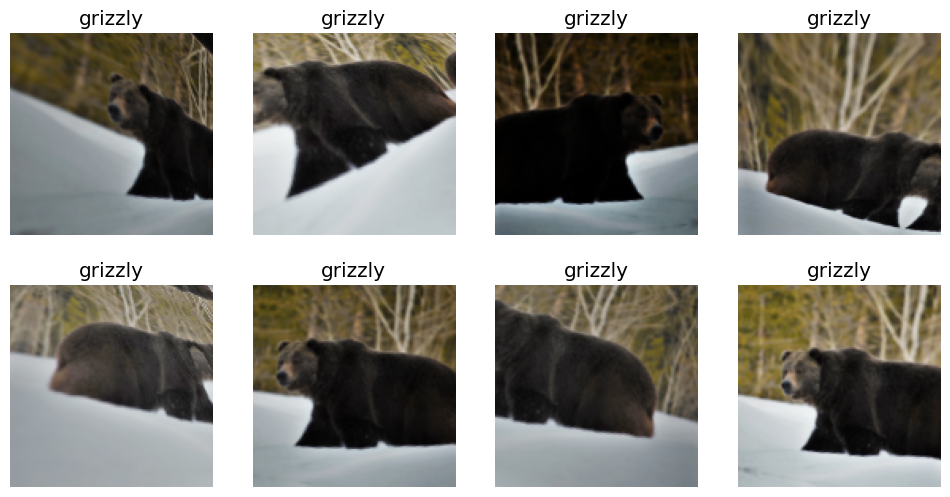

In [11]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [12]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [13]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 47.1MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.700660,0.948971,0.243590,00:21


epoch,train_loss,valid_loss,error_rate,time
0,0.272609,0.283569,0.076923,00:22
1,0.240474,0.117593,0.038462,00:23
2,0.191263,0.077140,0.025641,00:22
3,0.164428,0.069286,0.025641,00:20


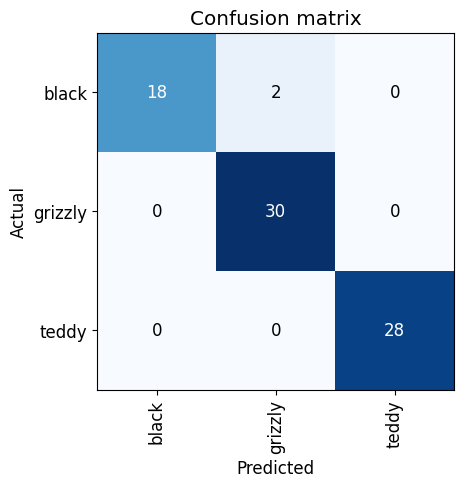

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

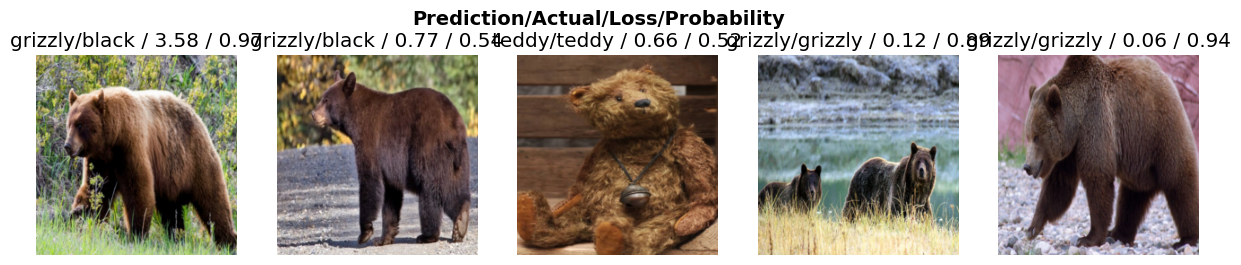

In [15]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
#hide
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('/content/drive/MyDrive/CS171 Intro to AI/bears/black/00828dc0-b637-406b-9f6a-c130f2db7a58.jpg')

In [ ]:
learn_inf.dls.vocab

In [ ]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

In [ ]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['/content/drive/MyDrive/CS171 Intro to AI/bears/grizzly/009bc0df-4969-43cc-a2d0-d7746e480dc4.jpg'])

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

In [ ]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [ ]:
#hide_output
VBox([widgets.Label('Select your bear!'),
      btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
#hide
!pip install voila
!jupyter serverextension enable --sys-prefix voila